<a href="https://colab.research.google.com/github/JhonathanOrtiz/Data-structre-python/blob/master/QueueStacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # <strong>Stacks</strong>

Como tipo de dato abstracto no tienen mucha diferencia a pilas de objetos, en los que tienes un conjunto de objetos, unos sobre otros y puedes sacarlos uno por uno desde el ùltimo que metiste. Por ésta razón son llamadas listas FIFO (Last in first out) es decir el último que entra es el primero que sale.





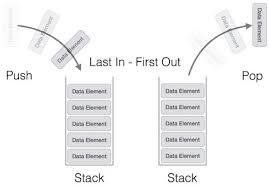

A ésta estructura de datos solo son atribuibles las siguientes funciones.

* Push (Insertar dato)
* Pop  (Sacar dato)
* isEmpty (La lista esta vacia?)
* Top (Elemento en el tope de la lista)

In [1]:
#Build the Stack class

class Stack:
  def __init__(self):
    self.stack = [] #Initalize an list
    self.top = -1 #top counter
  
  #Insert element on top list
  def Push(self, data):
    self.stack.insert(0, data)
    self.top += 1
    
  #Remove element at top of list
  def Pop(self):
    if self.top == -1:
      raise Exception('Stack is empty')
    self.stack.pop(0)
    self.top -= 1

  #Return element at top of list
  def Top(self):
    if self.top == -1:
      raise Exception('Stack is empty')
    return self.stack[0]
  #Return True if list is empty
  def isEmpty(self):
    if self.top == -1:
      return True
    else:
      return False
  #How many element are there in the list
  def Len(self):
    return self.top + 1 

Ahora, más que conocer como implementar una estrcutura de datos es importante saber como y para que implementarlas, pues aquí tenemos la primera muestra.

Si en un stack nos metemos cosas y las sacamos en orden inverso al cual metimos, entonces si pensamos un poco y metemos caracteres de un string y luego los sacamos habriamos volteado el string.

In [2]:
def reverse_string(string):
  stack = Stack()
  lista = []
  for i in string:
    stack.Push(str(i))
  for i in range(len(string)):
    lista.append(stack.Top())
    stack.Pop()
  return "".join(lista)

string = 'hello world'
reverse_string(string)

'dlrow olleh'

Tienes idea como los editores código saben cuando no cerramos algún parentesis?

IDEA: Si obviamos caracteres distintintos a `( )` `{ }` y `[ ]` y meteemos en un stack cada uno de los que se vaya abriendo esto tiene la particularidad que el ultimo elemento que se abre es el primero que se debe cerrar, es decir, data alguna expresión con muchos de estos ejemplo

`
[{([])}]
`

si te das cuenta el corche es el ultimo que se abre y el primero que se cierra, esto se cumple siemrpe!

AHORA: Si haemos push en un stack de los elementos que se abren y cuando  tomemos con un elemento que se cierre ese elemento debe debe ser la contraparte de elemento en el top del stack.



In [8]:
def checkBalance(exp: str):
  
  opening  = ['(', '[', '{']
  closing = [')', ']', '}']

  s = Stack()

  for char in exp:
    if char in opening:
      s.Push(char)
    elif char in closing:
      index_closing = closing.index(str(char))
      index_opening = opening.index(str(s.Top()))
      if index_closing != index_opening:
        return 'Unbalanced' 
      else:
        s.Pop()
  return 'Balanced'

data  = '{[()]}'
data1 = '[{[}]]'
print(checkBalance(data))
print(checkBalance(data1))

Balanced
Unbalanced


In [9]:
def prefix_parsing(string):
  s = Stack()
  operators = ['+', '-', '*', '/']

  for item in string:
    if item not in operators:
      s.Push(item)
    elif item in operators:
      number_2 = int(s.Top())
      s.Pop()
      number = int(s.Top())
      s.Pop()
      if operators.index(item) == 0:
        s.Push(number+number_2)
      elif operators.index(item) == 1:
        s.Push(number-number_2)
      elif operators.index(item) == 2:
        s.Push(number*number_2)
      else:
        s.Push(number/number_2)
  return s.Top()

data = '23*54*+9-'
prefix_parsing(data)

17



> # <strong>Queues</strong>

Asì como podemos tener estructuras de datos tipo `LIFO` (STACKS) necesitamos alguna structura de tipo `FIFO` (QUEUES) ésta ultima es muy similar a las structuras con `LIFO` ya que todas sus operaciones se realizan en un Time Complexity constante, ahora bien ¿Cual es la diferencia? pues que estas listas son `FIFO` es decir lo First In First Out es decir que al llamar al método `pop()` vamos a poder extraer el primer elemento que insertamos. 

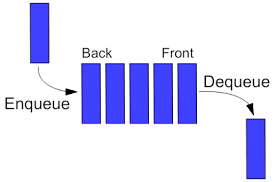


In [20]:
class Queue:
  def __init__(self, data=None, max_len=0):
    if type(data) == list:
      self.queue = data
      
    elif type(data) == int or type(data) == str:
      self.queue = [data]
    elif type(data) == tuple:
      self.queue = list(data)
      
    elif data == None:
      self.queue = []
      
    self.max_len = max_len
    self.front = -1

  def enqueue(self, data):
    if self.max_len > 0 and len(self.queue) < self.max_len:
      self.queue.append(data)
      self.front +=  1
    elif self.max_len == 0:
      self.queue.append(data)
      self.front +=1
    elif len(self.enqueue) == self.max_len:
      self.dequeue()
      self.append(data)

  def dequeue(self):
    if self.front == -1:
      raise Exception('Queue is empty')
    else:
      data = self.queue[-1]
      self.queue.remove(data)
      print(data, 'Dequeued')
        
  def get_front(self):
    return self.queue[0]
  

In [21]:
queue = Queue()
queue.enqueue(1)
queue.enqueue('hola')
queue.enqueue(1.45)
print(queue.get_front())
queue.dequeue()
print(queue.get_front())

1
1.45 Dequeued
1
